In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix # import the confusion matrix function
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

C:\Users\Loc Sensei\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data fields
##### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## Files

train.csv - historical data including Sales

test.csv - historical data excluding Sales

store.csv - supplemental information about the stores

Analyse the data probably from Jan 1 2013 to Dec 31 2013

In [2]:
train_df = pd.read_csv('Rossmann_train.csv', low_memory=False)


# Data Cleaning

In [4]:
train_df
#train_df.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [6]:
train_df.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

train_df['year']= train_df['Date'].dt.year
train_df['month']= train_df['Date'].dt.month
train_df['day']= train_df['Date'].dt.day
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
train_df['day_of_week_name']=train_df['Date'].dt.weekday.map(dw_mapping)

train_df['SalePerCustomer'] = (train_df['Sales']/train_df['Customers']).round()

train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,Friday,9.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,Friday,10.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,Friday,10.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,Friday,9.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,Friday,9.0


In [8]:
train_df.dtypes

Store                        int64
DayOfWeek                    int64
Date                datetime64[ns]
Sales                        int64
Customers                    int64
Open                         int64
Promo                        int64
StateHoliday                object
SchoolHoliday                int64
year                         int64
month                        int64
day                          int64
day_of_week_name            object
SalePerCustomer            float64
dtype: object

In [9]:
train_df=pd.get_dummies(train_df, columns =['StateHoliday'])
train_df = train_df.rename({'StateHoliday_0': 'No_holiday', 'StateHoliday_a': 'Public','StateHoliday_b': 'Easter','StateHoliday_c': 'Christmas', }, axis=1)


In [10]:
train_df=train_df.fillna(0) 
#Just fillna = 0 because sale/customer because sales must be 0 when customer = 0, but the denominator cannot = 0 so it returns NaN

# Data Analysis

In [10]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,No_holiday,Public,Easter,Christmas
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017205,1112,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0


### Sales in Public Holiday 

In [11]:
pub_hols = train_df.loc[(train_df['Public']==1) & (train_df['Sales']!=0) &(train_df['Open']==1)]
pub_hols

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,No_holiday,Public,Easter,Christmas
63559,5,4,2015-06-04,5807,625,1,1,0,2015,6,4,Thursday,9.0,0,1,0,0
63560,6,4,2015-06-04,5749,614,1,1,0,2015,6,4,Thursday,9.0,0,1,0,0
63609,55,4,2015-06-04,5984,702,1,1,0,2015,6,4,Thursday,9.0,0,1,0,0
63611,57,4,2015-06-04,9301,870,1,1,0,2015,6,4,Thursday,11.0,0,1,0,0
63614,60,4,2015-06-04,10399,850,1,1,0,2015,6,4,Thursday,12.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,2013,1,1,Tuesday,6.0,0,1,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,2013,1,1,Tuesday,5.0,0,1,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,2013,1,1,Tuesday,4.0,0,1,0,0
1017042,948,2,2013-01-01,4491,1039,1,0,1,2013,1,1,Tuesday,4.0,0,1,0,0


<AxesSubplot:xlabel='Public', ylabel='Sales'>

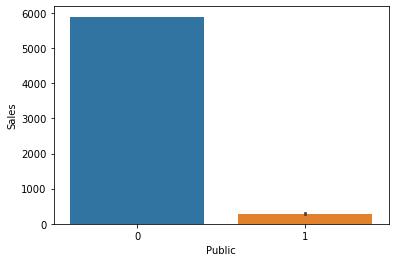

In [12]:
sns.barplot(data = train_df, x = 'Public', y = 'Sales')

### Sales on Easter

In [13]:
Easter = train_df.loc[(train_df['Easter']==1) & (train_df['Sales']!=0)]
Easter

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,No_holiday,Public,Easter,Christmas
129424,85,1,2015-04-06,11675,1706,1,0,1,2015,4,6,Monday,7.0,0,0,1,0
129461,122,1,2015-04-06,3651,485,1,0,1,2015,4,6,Monday,8.0,0,0,1,0
129548,209,1,2015-04-06,1419,145,1,0,1,2015,4,6,Monday,10.0,0,0,1,0
129598,259,1,2015-04-06,17466,3134,1,0,1,2015,4,6,Monday,6.0,0,0,1,0
129601,262,1,2015-04-06,33655,5152,1,0,0,2015,4,6,Monday,7.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919771,682,5,2013-03-29,9135,1499,1,1,1,2013,3,29,Friday,6.0,0,0,1,0
919822,733,5,2013-03-29,18431,3650,1,1,1,2013,3,29,Friday,5.0,0,0,1,0
919858,769,5,2013-03-29,10489,2296,1,1,1,2013,3,29,Friday,5.0,0,0,1,0
920037,948,5,2013-03-29,8514,1745,1,1,1,2013,3,29,Friday,5.0,0,0,1,0


<AxesSubplot:xlabel='Easter', ylabel='Sales'>

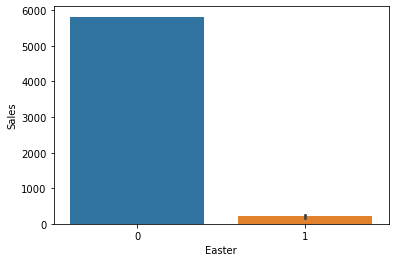

In [14]:
sns.barplot(data = train_df, x = 'Easter', y = 'Sales')

### Sales on Christmas

In [15]:
Christmas = train_df.loc[(train_df['Christmas']==1) & (train_df['Sales']!=0)]
Christmas

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,No_holiday,Public,Easter,Christmas
241126,85,5,2014-12-26,9741,1161,1,0,1,2014,12,26,Friday,8.0,0,0,0,1
241267,259,5,2014-12-26,17597,2544,1,0,1,2014,12,26,Friday,7.0,0,0,0,1
241270,262,5,2014-12-26,32169,4468,1,0,1,2014,12,26,Friday,7.0,0,0,0,1
241281,274,5,2014-12-26,7818,1412,1,0,1,2014,12,26,Friday,6.0,0,0,0,1
241298,299,5,2014-12-26,1800,190,1,0,1,2014,12,26,Friday,9.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617657,733,3,2013-12-25,12223,2335,1,0,1,2013,12,25,Wednesday,5.0,0,0,0,1
617693,769,3,2013-12-25,10033,2055,1,0,1,2013,12,25,Wednesday,5.0,0,0,0,1
617872,948,3,2013-12-25,7138,1320,1,0,1,2013,12,25,Wednesday,5.0,0,0,0,1
618005,1081,3,2013-12-25,1929,335,1,0,1,2013,12,25,Wednesday,6.0,0,0,0,1


<AxesSubplot:xlabel='Christmas', ylabel='Sales'>

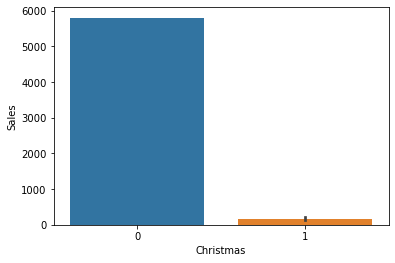

In [16]:
sns.barplot(data = train_df, x = 'Christmas', y = 'Sales')

### Sales on SchoolHoliday (Close vs Open)

In [17]:
train_df.loc[(train_df['SchoolHoliday']==0) & (train_df['Sales']>0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,No_holiday,Public,Easter,Christmas
12,13,5,2015-07-31,8821,568,1,1,0,2015,7,31,Friday,16.0,1,0,0,0
19,20,5,2015-07-31,9593,974,1,1,0,2015,7,31,Friday,10.0,1,0,0,0
21,22,5,2015-07-31,6566,633,1,1,0,2015,7,31,Friday,10.0,1,0,0,0
31,32,5,2015-07-31,6395,635,1,1,0,2015,7,31,Friday,10.0,1,0,0,0
35,36,5,2015-07-31,12422,1251,1,1,0,2015,7,31,Friday,10.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014946,1082,4,2013-01-03,7303,1185,1,0,0,2013,1,3,Thursday,6.0,1,0,0,0
1014954,1090,4,2013-01-03,4607,689,1,0,0,2013,1,3,Thursday,7.0,1,0,0,0
1014957,1093,4,2013-01-03,8371,882,1,0,0,2013,1,3,Thursday,9.0,1,0,0,0
1014962,1098,4,2013-01-03,4591,675,1,0,0,2013,1,3,Thursday,7.0,1,0,0,0


In [18]:
train_df.loc[(train_df['SchoolHoliday']==1) & (train_df['Sales']>0)]
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,No_holiday,Public,Easter,Christmas
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017205,1112,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0


<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

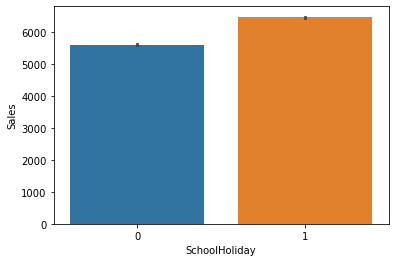

In [19]:
sns.barplot(data = train_df, x = 'SchoolHoliday', y = 'Sales')

In [20]:
zero_sales = train_df[(train_df.Open == 1) & (train_df.Sales > 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (844338, 17)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,No_holiday,Public,Easter,Christmas
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,Friday,10.0,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,Friday,9.0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,Friday,9.0,1,0,0,0


In [21]:
zero_sales = train_df[(train_df.Open == 1) & (train_df.Sales == 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (54, 17)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,No_holiday,Public,Easter,Christmas
86825,971,5,2015-05-15,0,0,1,0,1,2015,5,15,Friday,0.0,1,0,0,0
142278,674,4,2015-03-26,0,0,1,0,0,2015,3,26,Thursday,0.0,1,0,0,0
196938,699,4,2015-02-05,0,0,1,1,0,2015,2,5,Thursday,0.0,1,0,0,0
322053,708,3,2014-10-01,0,0,1,1,0,2014,10,1,Wednesday,0.0,1,0,0,0
330176,357,1,2014-09-22,0,0,1,0,0,2014,9,22,Monday,0.0,1,0,0,0


- From table above, there are some stores that open but unfortunately there were not any sales

In [22]:
zero_sales = train_df[(train_df.Open == 0) & (train_df.Sales > 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (0, 17)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,No_holiday,Public,Easter,Christmas


In [23]:
zero_sales = train_df[(train_df.Open == 0) & (train_df.Sales == 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (172817, 17)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,No_holiday,Public,Easter,Christmas
291,292,5,2015-07-31,0,0,0,1,1,2015,7,31,Friday,0.0,1,0,0,0
875,876,5,2015-07-31,0,0,0,1,1,2015,7,31,Friday,0.0,1,0,0,0
1406,292,4,2015-07-30,0,0,0,1,1,2015,7,30,Thursday,0.0,1,0,0,0
1990,876,4,2015-07-30,0,0,0,1,1,2015,7,30,Thursday,0.0,1,0,0,0
2521,292,3,2015-07-29,0,0,0,1,1,2015,7,29,Wednesday,0.0,1,0,0,0


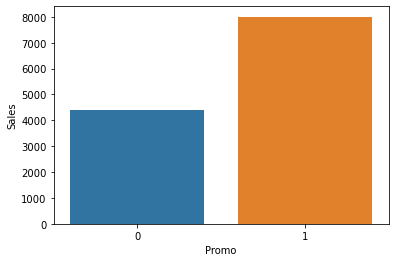

In [24]:
sns.barplot(x = 'Promo', y = 'Sales', data = train_df);

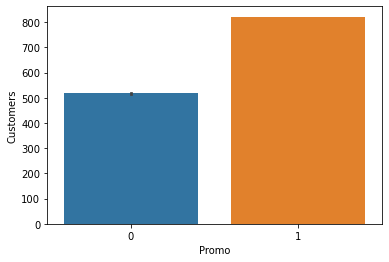

In [25]:
sns.barplot(x = 'Promo', y = 'Customers', data = train_df);

In [4]:
store_data_sales_1 = train_df.groupby([train_df['Store']])['Sales'].sum()
store_data_customers = train_df.groupby([train_df['Store']])['Customers'].sum()
store_data_avg_sales = train_df.groupby([train_df['Store']])['Sales'].mean()
store_data_avg_customers = train_df.groupby([train_df['Store']])['Customers'].mean()
store_data_avg_salepercustomer = train_df.groupby(['Store']).agg({'SalePerCustomer': ['mean']}).reset_index(0).round(1)

print(store_data_sales_1.loc[store_data_sales_1==store_data_sales_1.max()]) #Maximum total sales
print(store_data_sales_1.loc[store_data_sales_1==store_data_sales_1.min()]) #Minimum total sales


print(store_data_avg_salepercustomer.max()) #Maximum SalesPerCustomer
print(store_data_avg_salepercustomer.min()) #Minimum SalesPerCustomer

print(store_data_avg_salepercustomer.loc[store_data_avg_salepercustomer['SalePerCustomer','mean'] == 13.2]) #Store with Maximum SalesPerCustomer
print(store_data_avg_salepercustomer.loc[store_data_avg_salepercustomer['SalePerCustomer','mean'] == 3.5]) #Store with Minimum SalesPerCustomer



KeyError: "Column(s) ['SalePerCustomer'] do not exist"

In [6]:
print(store_data_sales_1)


Store
1        3716854
2        3883858
3        5408261
4        7556507
5        3642818
          ...   
1111     4091076
1112     7974294
1113     5196242
1114    16202585
1115     4922229
Name: Sales, Length: 1115, dtype: int64


### Top and bottom 20 percent of Stores in terms of total sales over 2013-2015 

In [27]:
train_df_20percent = train_df.copy()

#Group by mean per store and assign the values to the new variable 'store_data_sales'
train_df_20percent['store_data_sales'] = train_df_20percent['Sales'].groupby(train_df_20percent['Store']).transform('mean') 


#Using quantile to take the least sales required to be in the top 20%
train_df_20percent['store_data_sales'].quantile(0.8).round(0)


"""
So 7019 is the least required amount of sales to be in top 20%. Then I used drop_duplicates to drop the duplicated(same) values 
in the new column because if you notice, every store only has 1 mean value for sales, so just take the mean value for each store 
only once. 

For example, if you filter data by Store == 4, you will see the 'store_data_sales' column contains the same number but we only
need one, to rank the store by sales
"""
train_df_20percent.loc[(train_df_20percent['store_data_sales'] > 7019)].drop_duplicates(subset=['store_data_sales']) 




,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,No_holiday,Public,Easter,Christmas,store_data_sales
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,Friday,9.0,1,0,0,0,8021.769639
6,7,5,2015-07-31,15344,1414,1,1,1,2015,7,31,Friday,11.0,1,0,0,0,7356.902335
23,24,5,2015-07-31,14190,1082,1,1,1,2015,7,31,Friday,13.0,1,0,0,0,7763.773885
24,25,5,2015-07-31,14180,1586,1,1,1,2015,7,31,Friday,9.0,1,0,0,0,8892.311040
26,27,5,2015-07-31,13213,1263,1,1,1,2015,7,31,Friday,10.0,1,0,0,0,7838.438429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1097,5,2015-07-31,11443,2451,1,1,1,2015,7,31,Friday,5.0,1,0,0,0,9744.599788
1098,1099,5,2015-07-31,12074,1370,1,1,1,2015,7,31,Friday,9.0,1,0,0,0,7340.338641
1100,1101,5,2015-07-31,13501,1111,1,1,1,2015,7,31,Friday,12.0,1,0,0,0,8299.635881
1111,1112,5,2015-07-31,9626,767,1,1,1,2015,7,31,Friday,13.0,1,0,0,0,8465.280255


- The result above indicates that there are 220 stores in the top 20% from 2013 to 2015 by average sales

In [28]:
# Now I want to get my original top 20 percent dataset back so I ignore the drop_duplicates. 
top_20 = train_df_20percent.loc[(train_df_20percent['store_data_sales'] > 7019)]
top_20

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,No_holiday,Public,Easter,Christmas,store_data_sales
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,Friday,9.0,1,0,0,0,8021.769639
6,7,5,2015-07-31,15344,1414,1,1,1,2015,7,31,Friday,11.0,1,0,0,0,7356.902335
23,24,5,2015-07-31,14190,1082,1,1,1,2015,7,31,Friday,13.0,1,0,0,0,7763.773885
24,25,5,2015-07-31,14180,1586,1,1,1,2015,7,31,Friday,9.0,1,0,0,0,8892.311040
26,27,5,2015-07-31,13213,1263,1,1,1,2015,7,31,Friday,10.0,1,0,0,0,7838.438429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017190,1097,2,2013-01-01,5961,1405,1,0,1,2013,1,1,Tuesday,4.0,0,1,0,0,9744.599788
1017192,1099,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0,7340.338641
1017194,1101,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0,8299.635881
1017205,1112,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0,8465.280255


In [29]:
# Same shit :>
train_df_20percent['store_data_sales'].quantile(0.2).round(0)
train_df_20percent.loc[(train_df_20percent['store_data_sales'] < 4224)].drop_duplicates(subset=['store_data_sales'])



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,No_holiday,Public,Easter,Christmas,store_data_sales
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,Friday,9.0,1,0,0,0,3945.704883
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,Friday,10.0,1,0,0,0,4122.991507
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,Friday,9.0,1,0,0,0,3867.110403
12,13,5,2015-07-31,8821,568,1,1,0,2015,7,31,Friday,16.0,1,0,0,0,4124.773087
21,22,5,2015-07-31,6566,633,1,1,0,2015,7,31,Friday,10.0,1,0,0,0,3695.918206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,1103,5,2015-07-31,8628,565,1,1,1,2015,7,31,Friday,15.0,1,0,0,0,4161.639066
1104,1105,5,2015-07-31,7994,765,1,1,1,2015,7,31,Friday,10.0,1,0,0,0,3774.736730
1105,1106,5,2015-07-31,5901,618,1,1,1,2015,7,31,Friday,10.0,1,0,0,0,4073.217622
1108,1109,5,2015-07-31,5263,515,1,1,0,2015,7,31,Friday,10.0,1,0,0,0,4043.167546


- The result above indicates that there are 223 stores in the bottom 20% from 2013 to 2015

In [30]:
bot_20 = train_df_20percent.loc[(train_df_20percent['store_data_sales'] < 4224)]
bot_20

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,day,day_of_week_name,SalePerCustomer,No_holiday,Public,Easter,Christmas,store_data_sales
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,Friday,9.0,1,0,0,0,3945.704883
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,Friday,10.0,1,0,0,0,4122.991507
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,Friday,9.0,1,0,0,0,3867.110403
12,13,5,2015-07-31,8821,568,1,1,0,2015,7,31,Friday,16.0,1,0,0,0,4124.773087
21,22,5,2015-07-31,6566,633,1,1,0,2015,7,31,Friday,10.0,1,0,0,0,3695.918206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017196,1103,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0,4161.639066
1017198,1105,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0,3774.736730
1017199,1106,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0,4073.217622
1017202,1109,2,2013-01-01,0,0,0,0,1,2013,1,1,Tuesday,0.0,0,1,0,0,4043.167546


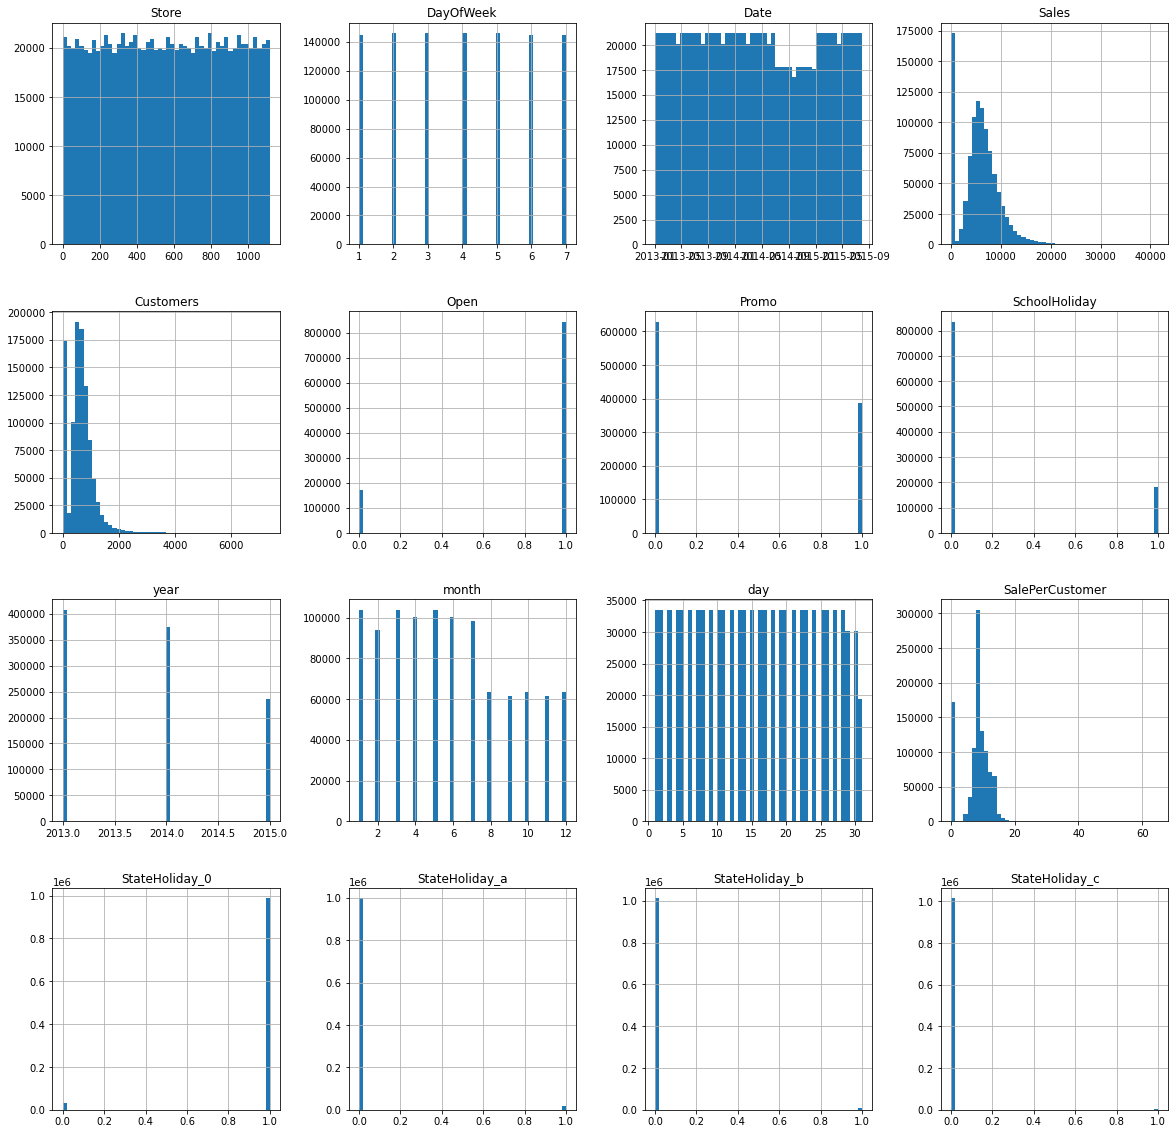

In [111]:
train_df.hist(bins = 50, figsize = (20,20));

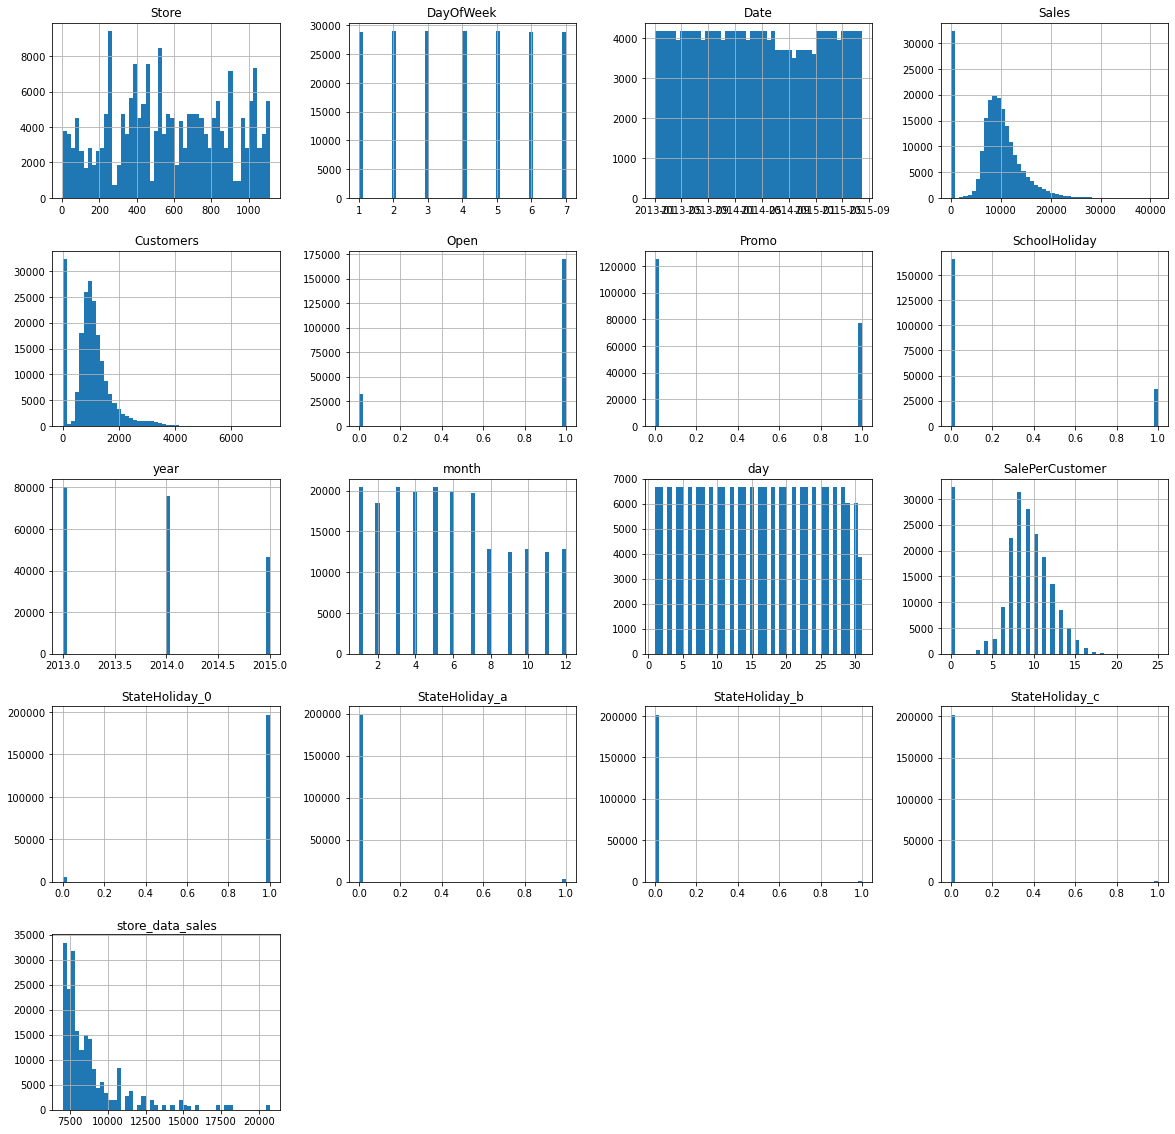

In [112]:
top_20.hist(bins = 50, figsize = (20,20));

### Sales per month/day/day of week for original train_df

Text(0.5, 1.0, 'Sales per year')

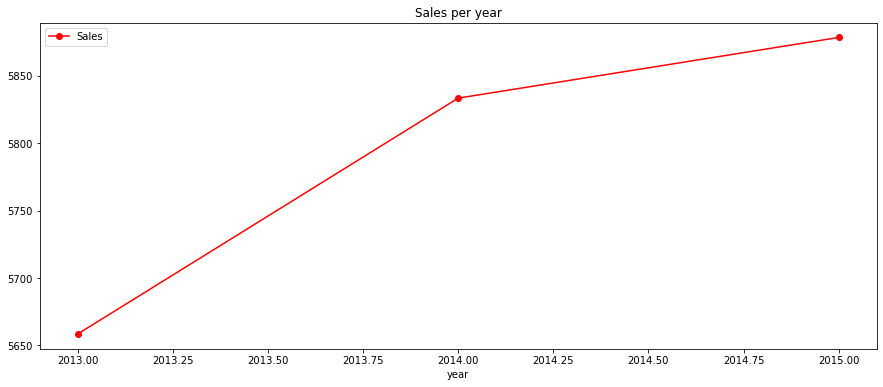

In [117]:
Sales_per_year = train_df.groupby('year')[['Sales']].mean().plot(figsize = (15,6), marker = 'o', color = 'r')
Sales_per_year.set_title('Sales per year')

Text(0.5, 1.0, 'Sales per month')

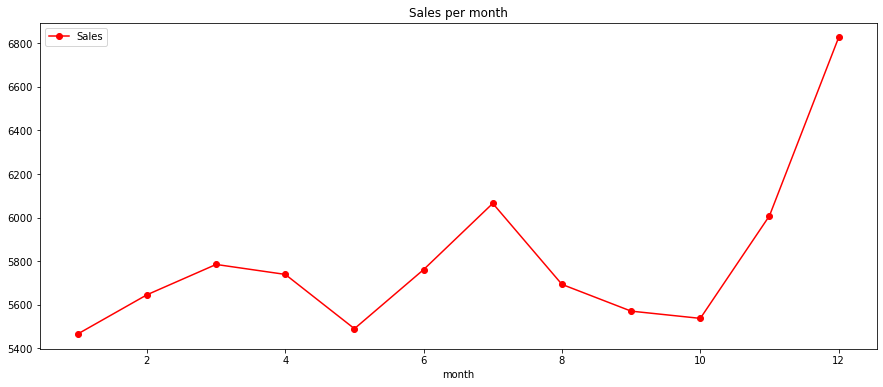

In [118]:
Sales_per_month = train_df.groupby('month')[['Sales']].mean().plot(figsize = (15,6), marker = 'o', color = 'r')
Sales_per_month.set_title('Sales per month')

Text(0.5, 1.0, 'Sales per day')

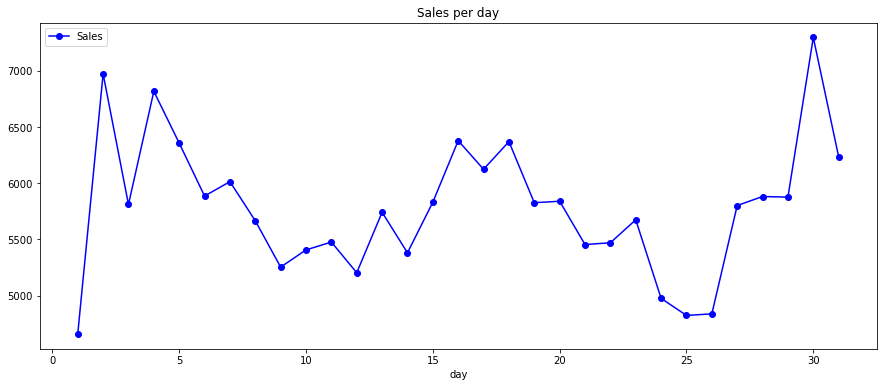

In [119]:
Sales_per_day = train_df.groupby('day')[['Sales']].mean().plot(figsize = (15,6), marker = 'o', color = 'b')
Sales_per_day.set_title('Sales per day')

Text(0.5, 1.0, 'Sales per day in week')

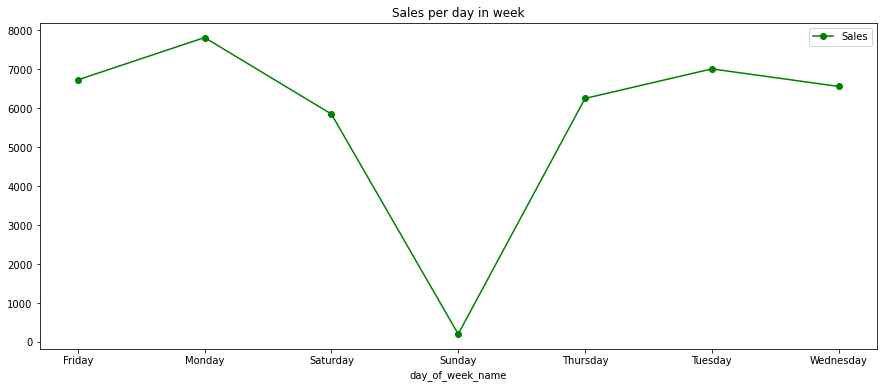

In [120]:
Sales_per_day_of_week = train_df.groupby('day_of_week_name')[['Sales']].mean().plot(figsize = (15,6), marker = 'o', color = 'g')
Sales_per_day_of_week.set_title('Sales per day in week')

### A few plots for top 20% 

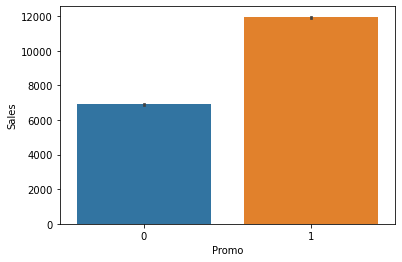

In [20]:
sns.barplot(x = 'Promo', y = 'Sales', data = top_20);

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

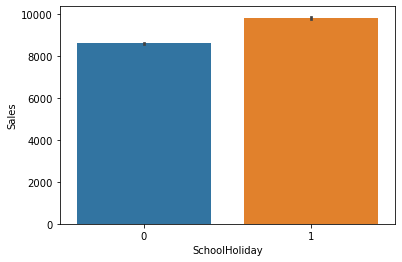

In [25]:
sns.barplot(data = top_20, x = 'SchoolHoliday', y = 'Sales')

<AxesSubplot:xlabel='Public', ylabel='Sales'>

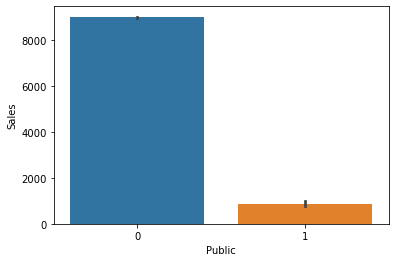

In [26]:
sns.barplot(data = top_20, x = 'Public', y = 'Sales')

<AxesSubplot:xlabel='Easter', ylabel='Sales'>

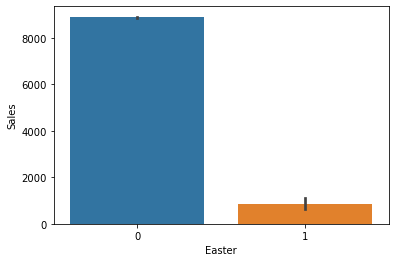

In [27]:
sns.barplot(data = top_20, x = 'Easter', y = 'Sales')

<AxesSubplot:xlabel='Christmas', ylabel='Sales'>

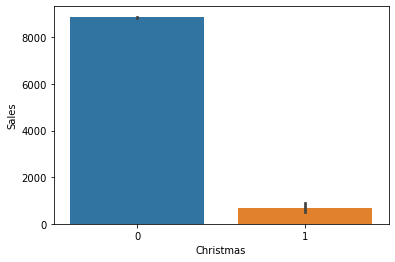

In [28]:
sns.barplot(data = top_20, x = 'Christmas', y = 'Sales')

Text(0.5, 1.0, 'Sales per year top_20')

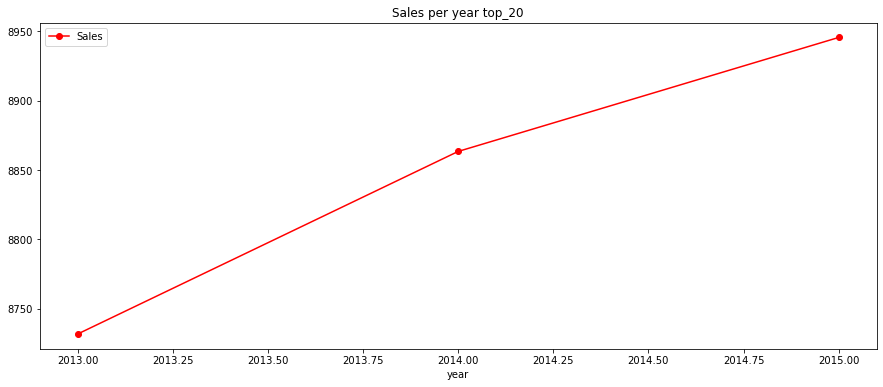

In [29]:
Sales_per_year_20 = top_20.groupby('year')[['Sales']].mean().plot(figsize = (15,6), marker = 'o', color = 'r')
Sales_per_year_20.set_title('Sales per year top_20')

Text(0.5, 1.0, 'Sales per month top_20')

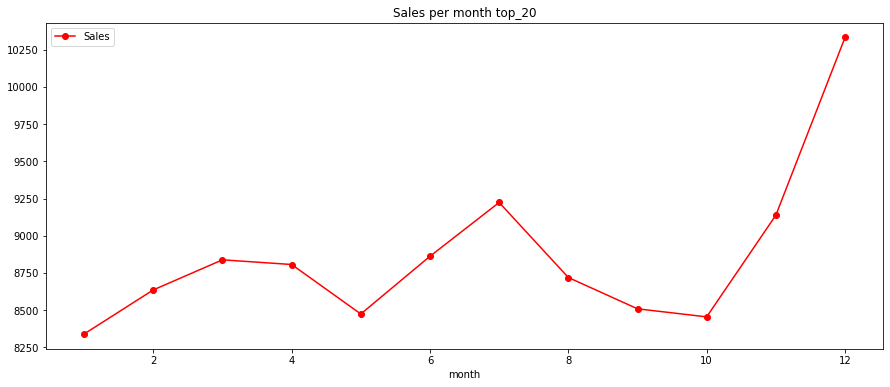

In [30]:
Sales_per_month_20 = top_20.groupby('month')[['Sales']].mean().plot(figsize = (15,6), marker = 'o', color = 'r')
Sales_per_month_20.set_title('Sales per month top_20')

Text(0.5, 1.0, 'Sales per day top_20')

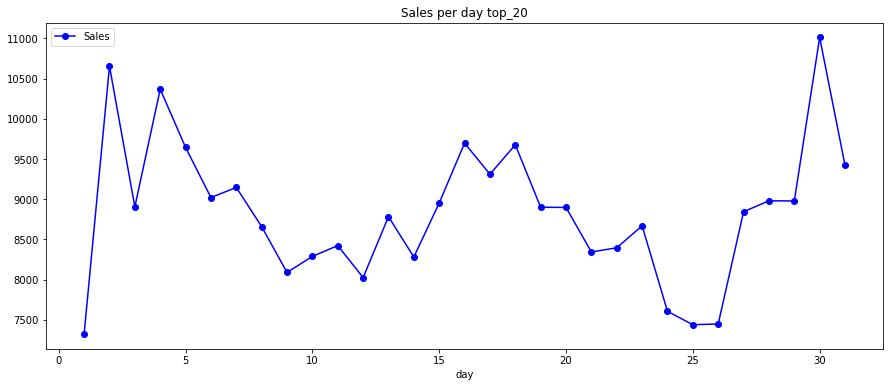

In [31]:
Sales_per_day_20 = top_20.groupby('day')[['Sales']].mean().plot(figsize = (15,6), marker = 'o', color = 'b')
Sales_per_day_20.set_title('Sales per day top_20')

Text(0.5, 1.0, 'Sales per day in week top_20')

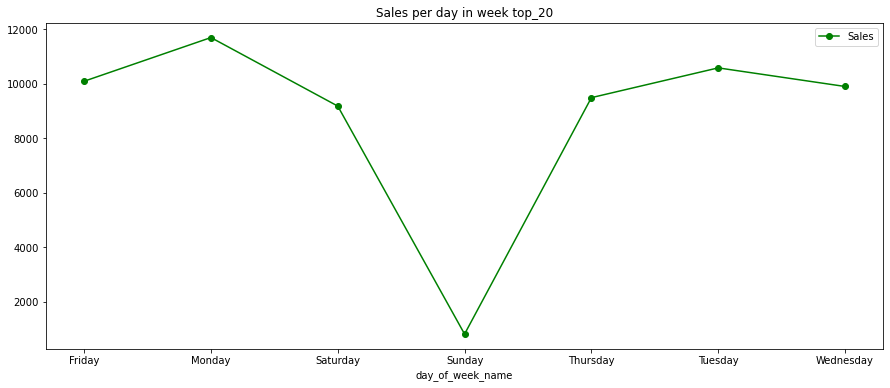

In [32]:
Sales_per_day_of_week_20 = top_20.groupby('day_of_week_name')[['Sales']].mean().plot(figsize = (15,6), marker = 'o', color = 'g')
Sales_per_day_of_week_20.set_title('Sales per day in week top_20')

                    Store  DayOfWeek     Sales  Customers      Open     Promo  \
Store            1.000000  -0.000008  0.005126   0.024325 -0.000047  0.000058   
DayOfWeek       -0.000008   1.000000 -0.462125  -0.386445 -0.528963 -0.392925   
Sales            0.005126  -0.462125  1.000000   0.894711  0.678472  0.452345   
Customers        0.024325  -0.386445  0.894711   1.000000  0.616768  0.316169   
Open            -0.000047  -0.528963  0.678472   0.616768  1.000000  0.295042   
Promo            0.000058  -0.392925  0.452345   0.316169  0.295042  1.000000   
SchoolHoliday    0.000641  -0.205388  0.085124   0.071568  0.086171  0.067483   
year             0.000290   0.001937  0.023519  -0.001212 -0.001009  0.024300   
month            0.001467  -0.005362  0.048768   0.038179 -0.000681 -0.011747   
day              0.000023   0.005136 -0.011612  -0.004473  0.033428 -0.108325   
SalePerCustomer -0.021699  -0.496647  0.657480   0.412260  0.870025  0.384243   
StateHoliday_0  -0.000542   

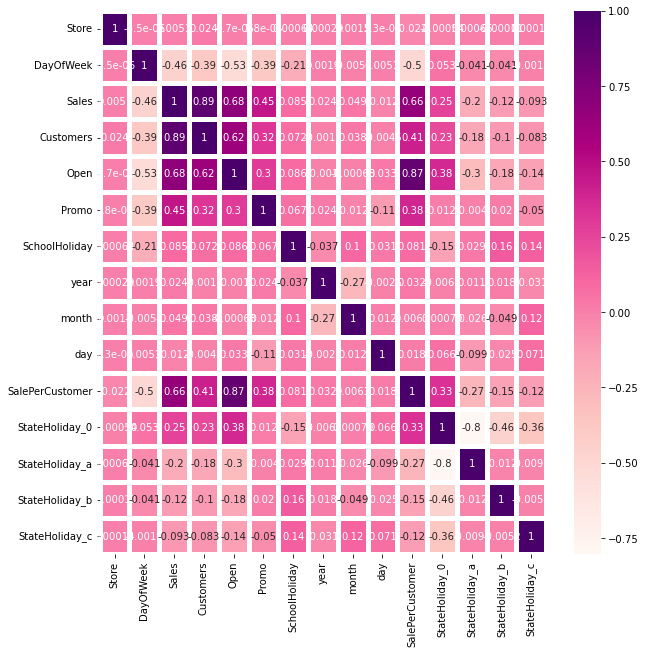

In [127]:
print(train_df.corr())
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

# plotting correlation heatmap
dataplot = sns.heatmap(train_df.corr(), cmap="RdPu", annot=True,linewidths=5)
  
# displaying heatmap
plt.show()